## 01 Import used libraries

In [ ]:
# required and used Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

## 02 Used Functions for feature engineering

*   Get dataframes data removing unwanted labels and null data

In [ ]:
from scipy.linalg import dft
def getTrainTestdata(df, required_label, removing_labels):

  # removeing null values and not required labels
  df = df.drop(removing_labels, axis =1).dropna()

  return df, df.pop(required_label)

*   Random Forest Classifier used to create the model


In [ ]:
def useRandommForestModel(X_train, y_train, X_test):
  # Define model. Specify a number for random_state to ensure same results each run
  model = RandomForestClassifier(random_state=1)

  # Fit model
  model.fit(X_train, y_train)

  # predict values using model
  predict_val = model.predict(X_test)

  return predict_val

*   K-Nearest Neighbor used to create the model

In [ ]:
def useKNN(X_train, y_train, X_test, n_neighbors = 5):
  # Create and train your KNN classifier model
  # You can perform hyperparameter tuning by changing the value of 'n_neighbors'
  knn = KNeighborsClassifier(n_neighbors)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  return y_pred

  # create KNN model
  # classifier = KNeighborsClassifier(n_neighbors=5)
  # classifier.fit(X_train, y_train)
  # y_pred = classifier.predict(X_test)
  # return y_pred

*   create a model using support vector machine using **sklearn.svm**

In [ ]:
from sklearn.svm import SVC
def useSVM(X_train, y_train, X_test):
  # standardize the data set
  svc = SVC(kernel="linear")

  # create KNN model
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  return y_pred

* Get the accuracy and report of the predictions

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

def getSummary(y_test, predict_val):
    print(confusion_matrix(y_test, predict_val))
    print(f"Accuracy: {accuracy_score(y_test, predict_val)}")
    print(f"F1 Score: {f1_score(y_test, predict_val, average='weighted')}")
    print(f"Precision: {precision_score(y_test, predict_val, average='weighted')}")
    print(f"Recall: {recall_score(y_test, predict_val, average='weighted')}")
    return [f"Accuracy: {accuracy_score(y_test, predict_val)}", f"F1 Score: {f1_score(y_test, predict_val, average='weighted')}",f"Precision: {precision_score(y_test, predict_val, average='weighted')}", f"Recall: {recall_score(y_test, predict_val, average='weighted')}"]
  # # get the mean absolute error of the model
  # MAE = mean_absolute_error(y_test, predict_val)

  # # get the accuracy of the model
  # accuracy = accuracy_score(y_test, predict_val)
  # report = classification_report(y_test, predict_val)
  # return MAE, report,accuracy

*   select best K number of features using sklearn **SelectBest** function which uses **f_regression**

In [ ]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression

def getSelectedFeatures(k, X_train, y_train):
  # define number of features to keep "k"

  # perform feature selection
  X_new = SelectKBest(f_regression, k=k).fit_transform(X_train, y_train)

  # get feature names of selected features
  selected_features = X_train.columns[SelectKBest(f_regression, k=k).fit(X_train, y_train).get_support()]

  return selected_features

*   Add a ***Principal Component Analysis(PCA)*** and get additional features by finding principal components

In [ ]:
from sklearn.decomposition import PCA
def apply_pca(n_Components, X_train, X_test, X_test_predict, standardize=True):
    # Standardize
    if standardize:
        X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
    # Create principal components
    pca = PCA(n_Components, svd_solver='full')
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    X_test_predict_pca = pca.transform(X_test_predict)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_train_pca.shape[1])]
    X_train_pca = pd.DataFrame(X_train_pca, columns=component_names)
    X_test_pca = pd.DataFrame(X_test_pca, columns=component_names)
    X_test_predict_pca = pd.DataFrame(X_test_predict_pca, columns=component_names)
    # Create loadings
    # loadings = pd.DataFrame(
    #     pca.components_.T,  # transpose the matrix of loadings
    #     columns=component_names,  # so the columns are the principal components
    #     index=X_train.columns,  # and the rows are the original features
    # )
    return pca, X_train_pca, X_test_pca, X_test_predict_pca

## 03 Reducing features by feature engineering of Label 01



###Get dataset and remove un wanted labels

In [ ]:
train = pd.read_csv("drive/MyDrive/ML_Project/train.csv")
test = pd.read_csv("drive/MyDrive/ML_Project/valid.csv")
test_predict = pd.read_csv("drive/MyDrive/ML_Project/test.csv")


X_train_label1, y_train_label1= getTrainTestdata(train, "label_3",['label_1','label_2','label_4'])
X_test_label1, y_test_label1  = getTrainTestdata(test, "label_3",['label_1','label_2','label_4'])
X_test_predict_label1  = test_predict.drop('ID', axis =1).dropna()

# standardize the data set
scaler = StandardScaler()
scaler.fit(X_train_label1)

component_names = X_train_label1.columns

 # scale the data set using new scale
X_train_label1 = pd.DataFrame(scaler.transform(X_train_label1), columns=component_names)
X_test_label1 =  pd.DataFrame(scaler.transform(X_test_label1), columns=component_names)
X_test_predict_label1 = pd.DataFrame(scaler.transform(X_test_predict_label1), columns=component_names)

X_train_label1.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,1.562805,-1.685749,0.100421,-1.577754,0.070770,1.383129,0.103170,-2.218398,-0.465011,-0.559632,...,-1.075648,0.777599,0.544137,-1.380666,1.336312,0.431514,1.896547,-0.356625,0.992811,1.177485
1,-0.031715,-1.008704,0.749025,-2.977916,1.192432,0.329776,0.400260,-2.300458,0.674372,-0.206806,...,0.159694,-0.550170,0.047530,-1.876222,0.206837,1.803850,-0.036412,1.082269,-1.818872,1.117962
2,-0.401302,0.133746,-0.711888,-0.486897,1.762638,-0.099495,-0.781570,0.186825,0.794428,0.773521,...,0.349208,-0.979356,-1.194778,-0.783110,0.644198,0.859079,1.137621,-0.036495,-1.355011,0.808519
3,-0.416746,1.091294,0.740525,-0.161889,-0.374029,0.376508,1.724300,-0.052912,-2.061369,1.242637,...,-2.074026,0.241661,-0.924957,0.356763,-0.807805,0.054561,1.122090,-0.882570,1.046143,-0.677927
4,0.888357,0.639093,1.329487,-0.403804,3.527180,-0.500023,0.608293,1.047827,-1.265407,-0.786446,...,-2.185281,0.226398,1.188350,-0.866187,-1.070200,1.770356,-0.118530,0.237206,-0.248249,-0.248508


<Axes: >

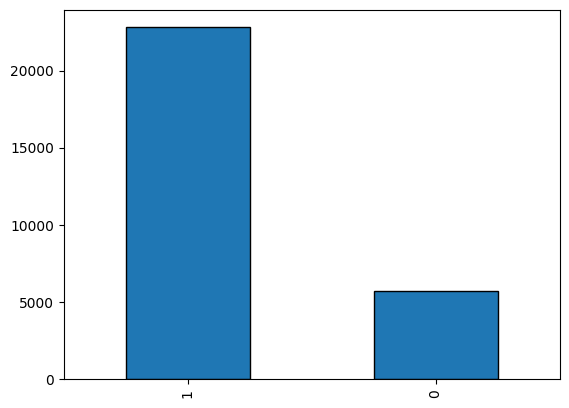

In [ ]:
y_train_label1.value_counts().plot(kind='bar', edgecolor='black')

### create a model using Random KNN before feature engineering

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useKNN(X_train_label1, y_train_label1, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)

print(classification_report)

[[137   5]
 [  6 602]]
Accuracy: 0.9853333333333333
F1 Score: 0.9853530286621905
Precision: 0.9853782944128907
Recall: 0.9853333333333333
<function classification_report at 0x7c5ebd078430>


### create a model using Random SVC before feature engineering

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_label1, y_train_label1, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)

print(classification_report)

[[142   0]
 [  2 606]]
Accuracy: 0.9973333333333333
F1 Score: 0.99734046074738
Precision: 0.9973703703703705
Recall: 0.9973333333333333
<function classification_report at 0x7c5ebd078430>


### Add KNN predicted data since it has the better accuracy to csv file

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

predicted_values = dict()

Before_FE_predict_label = useKNN(X_train_label1, y_train_label1, X_test_predict_label1)
predicted_values['Predicted labels before feature engineering'] = Before_FE_predict_label

### Find best k features and select

    (before selecting features checked if k is enough to achieve a better accuracy and finally come up with k features is enough)

In [ ]:
selected_features = getSelectedFeatures(300, X_train_label1, y_train_label1)

# print selected features
print(selected_features)

Index(['feature_5', 'feature_8', 'feature_12', 'feature_14', 'feature_17',
       'feature_19', 'feature_20', 'feature_21', 'feature_23', 'feature_24',
       ...
       'feature_750', 'feature_752', 'feature_753', 'feature_757',
       'feature_759', 'feature_761', 'feature_762', 'feature_764',
       'feature_765', 'feature_768'],
      dtype='object', length=300)


In [ ]:
X_train_selected_label1 = X_train_label1[list(selected_features)]
X_test_selected_label1 = X_test_label1[list(selected_features)]
X_test_predict_selected_label1 = X_test_predict_label1[list(selected_features)]

### Check the accuracy of the selected features are enogh or not using KNN

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useKNN(X_train_selected_label1, y_train_label1, X_test_selected_label1)
Summary = getSummary(y_test_label1, y_pred)

print("using KNN after redusing the features to create model: ")


[[140   2]
 [  2 606]]
Accuracy: 0.9946666666666667
F1 Score: 0.9946666666666667
Precision: 0.9946666666666667
Recall: 0.9946666666666667
using KNN after redusing the features to create model: 
<function classification_report at 0x7c5ebd078430>


### Check the accuracy of the selected features are enogh or not using SVC

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_selected_label1, y_train_label1, X_test_selected_label1)
Summary = getSummary(y_test_label1, y_pred)

print("using SVM after redusing the features to create model: ")


[[141   1]
 [  3 605]]
Accuracy: 0.9946666666666667
F1 Score: 0.9946809214947601
Precision: 0.9947178217821782
Recall: 0.9946666666666667
using SVM after redusing the features to create model: 


### Create a PCA to create new features using train data

In [ ]:
pca, X_train_pca, X_test_pca, X_test_predict_pca = apply_pca(0.99, X_train_label1, X_test_label1, X_test_predict_label1)
print(X_test_pca.keys())
# print(loadings.to_string())

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       ...
       'PC569', 'PC570', 'PC571', 'PC572', 'PC573', 'PC574', 'PC575', 'PC576',
       'PC577', 'PC578'],
      dtype='object', length=578)


### Find the status of the model using KNN after adding PCAs

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = useKNN(X_train_pca, y_train_label1, X_test_pca, 5)
Summary = getSummary(y_test_label1, y_pred)

print("Mean absolute error after adding new pca features of the model Lable_1: ")


[[138   4]
 [  4 604]]
Accuracy: 0.9893333333333333
F1 Score: 0.9893333333333333
Precision: 0.9893333333333333
Recall: 0.9893333333333333
Mean absolute error after adding new pca features of the model Lable_1: 
Classification report: 
 <function classification_report at 0x7c5ebd078430>


### Find the status of the model using SVC after adding PCAs

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_pca, y_train_label1, X_test_pca)
Summary = getSummary(y_test_label1, y_pred)

[[141   1]
 [  3 605]]
Accuracy: 0.9946666666666667
F1 Score: 0.9946809214947601
Precision: 0.9947178217821782
Recall: 0.9946666666666667


## hyper parameter tuning

*  Hyper parameter Tuning for KNN model

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
# fit the model on our train set
g_res = gs.fit(X_train_pca, y_train_label1)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [ ]:
# find the best score
g_res.best_score_

0.8665847097889188

In [ ]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'distance'}

*  Hyper parameter Tuning for KNN model

In [ ]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train_pca, y_train_label1)


KNeighborsClassifier(algorithm='brute')

In [ ]:
# get a prediction
y_hat = knn.predict(X_test_pca)

In [ ]:
print('Training set accuracy: ')
getSummary(y_test_label1, y_hat)
print('Test set accuracy: ')
getSummary(y_test_label1, y_pred)

### Hyper parameter Tuning

*  Hyper parameter Tuning for SVM model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV as rscv
param_dist = {
    'C': [0.1, 10, 15],
    'gamma': [0.001, 0.05, 0.1, 0.5, 1],
    'kernel': ['linear'],
    'degree': [1, 2]
}
svc_tuning = SVC(class_weight="balanced")
random_search = rscv(
    svc_tuning,
    param_distributions=param_dist)
random_search.fit(X_train_pca, y_train_label1)

RandomizedSearchCV(estimator=SVC(class_weight='balanced'),
                   param_distributions={'C': [0.1, 10, 15], 'degree': [1, 2],
                                        'gamma': [0.001, 0.05, 0.1, 0.5, 1],
                                        'kernel': ['linear']})

In [ ]:
print(random_search.best_params_)
print(random_search.best_estimator_.get_params())

{'kernel': 'linear', 'gamma': 0.1, 'degree': 2, 'C': 10}
{'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 0.1, 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
predict = random_search.predict(X_test_pca)
accuracy_score(y_test_label1, predict)

0.9093333333333333

In [ ]:
svc = SVC(class_weight="balanced", kernel= 'linear', gamma= 0.01, degree= 2, C= 10)

# create KNN model
svc.fit(X_train_pca, y_train_label1)
y_pred = svc.predict(X_test_pca)
summary = getSummary(y_test_label1, y_pred)

[[ 18   0   0   0   0   0   3   0   0   0   0   0   0   0]
 [  0   9   1   0   0   0   1   0   0   0   0   0   0   0]
 [  0   0  25   0   0   0   2   0   0   0   0   0   0   0]
 [  0   0   0   7   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0  14   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0  10   1   0   0   0   0   0   0   0]
 [  7   1  11   0   0   0 493   8   0   0   0   0  12   0]
 [  0   0   0   0   0   0   6  26   0   0   0   0   0   0]
 [  0   1   0   0   0   0   3   0  15   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0  16   0   0   0   0]
 [  0   0   0   0   1   0   0   1   0   0   7   0   1   0]
 [  0   0   0   0   1   0   0   0   0   0   0  10   0   0]
 [  0   0   1   0   0   0   2   0   1   0   0   0  22   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  10]]
Accuracy: 0.9093333333333333
F1 Score: 0.9123280161558986
Precision: 0.9202589371577091
Recall: 0.9093333333333333


*  Hyper parameter Tuning for Logistic Reggression classifier model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

logModel = LogisticRegression()
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
clf = RandomizedSearchCV(logModel, param_distributions = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train_pca, y_train_label1)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
21 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 64, in _check_solver
    raise ValueError(
ValueError: Only '

In [ ]:
predict2 = clf.predict(X_test_pca)
accuracy_score(y_test_label1, predict2)

0.9973333333333333

In [ ]:
logModel1 = LogisticRegression(C= 11.288378916846883, class_weight= 'balanced', dual= False, fit_intercept= True, intercept_scaling= 1, l1_ratio= None, max_iter= 10000, multi_class= 'auto', n_jobs= None, penalty= 'l1', random_state= None, solver= 'saga', tol= 0.0001, verbose= 0, warm_start= False)
logModel1.fit(X_train_pca, y_train_label1)
predict3 = logModel1.predict(X_test_pca)
accuracy_score(y_test_label1, predict3)

0.9973333333333333

In [ ]:
print(clf.best_estimator_.get_params())

{'C': 11.288378916846883, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


*  Hyper parameter Tuning for SVM modl

In [ ]:
from sklearn.model_selection import RandomizedSearchCV as rscv
svc_tuninh2 = SVC(class_weight="balanced")
param_dist1 = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear']
}
random_search2 = rscv(
    svc_tuninh2,
    param_distributions=param_dist1,
    n_iter=2, cv=5, n_jobs=-1, verbose=1,
    )
random_search2.fit(X_train_pca, y_train_label1)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5, estimator=SVC(class_weight='balanced'), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'linear']},
                   verbose=1)

In [ ]:
predict2 = random_search2.predict(X_test_pca)
accuracy_score(y_test_label1, predict2)

0.9946666666666667

In [ ]:
print(random_search2.best_estimator_.get_params())

{'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV as rscv
svc_tuninh3 = SVC()
param_dist2 = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear']
}
random_search3 = rscv(
    svc_tuninh3,
    param_distributions=param_dist2,
    n_iter=2, cv=5, n_jobs=-1, verbose=1,
    )
random_search3.fit(X_train_pca, y_train_label1)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=2, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'linear']},
                   verbose=1)

In [ ]:
predict2 = random_search3.predict(X_test_pca)
accuracy_score(y_test_label1, predict2)

0.9946666666666667

In [ ]:
print(random_search2.best_estimator_.get_params())

{'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


## Get best prediction

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import csv

best_model = LogisticRegression(C= 11.288378916846883, class_weight= 'balanced', dual= False, fit_intercept= True, intercept_scaling= 1, l1_ratio= None, max_iter= 10000, multi_class= 'auto', n_jobs= None, penalty= 'l1', random_state= None, solver= 'saga', tol= 0.0001, verbose= 0, warm_start= False)
best_model.fit(X_train_pca, y_train_label1)
best_predict = best_model.predict(X_test_pca)
accuracy_score(y_test_label1, best_predict)

y_pred_test = best_model.predict(X_test_predict_pca)

In [ ]:
# Create DataFrame
df = pd.DataFrame(y_pred_test, columns =["label_3"] )
df.head()
df.to_csv("drive/MyDrive/ML_Project/Project_Layer_7_Label_3", index=False)